# Test notebook  
Import libraries:

In [1]:
import functions as fun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the data from the file *"your_dataset.csv"*:

In [2]:
# Load the data
data = pd.read_csv('../Data/your_dataset.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1


### Train and Test the Perceptron Algorithm: 


In [9]:
zol_training_perceptron=[]
zol_test_perceptron=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train = fun.perceptron(x_train, y_train, 0.01, 100)
    # Calculate the 0-1 loss on the training set
    zol_training_perceptron.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test = np.sign(np.dot(x_test, prediction_train[0])) # Predict the test set
    zol_test_perceptron.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))
    

### Train and Test the Pegasos algorithm:

In [4]:
zol_training_pegasos=[]
zol_test_pegasos=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train_pegasos = fun.pegasos(x_train, y_train, 0.1, 500, 100)
    # Calculate the 0-1 loss on the training set
    zol_training_pegasos.append(fun.zero_one_loss(prediction_train_pegasos[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_pegasos = np.sign(np.dot(x_test, prediction_train_pegasos[0])) # Predict the test set
    zol_test_pegasos.append(fun.zero_one_loss(prediction_test_pegasos, y_test, y_test.shape[0]))


### Train and test Regularized Logistic Classification:

In [5]:
zol_training_rlc=[]
zol_test_rlc=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train_rlc = fun.regularized_logistic(x_train, y_train, 0.1, 500, 100)
    # Calculate the 0-1 loss on the training set
    zol_training_rlc.append(fun.zero_one_loss(prediction_train_rlc[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_rlc = np.sign(np.dot(x_test, prediction_train_rlc[0])) # Predict the test set
    zol_test_rlc.append(fun.zero_one_loss(prediction_test_rlc, y_test, y_test.shape[0]))

#### Graphical representation of the 0-1 loss for the Perceptron, Pegasos and RLC algorithms:

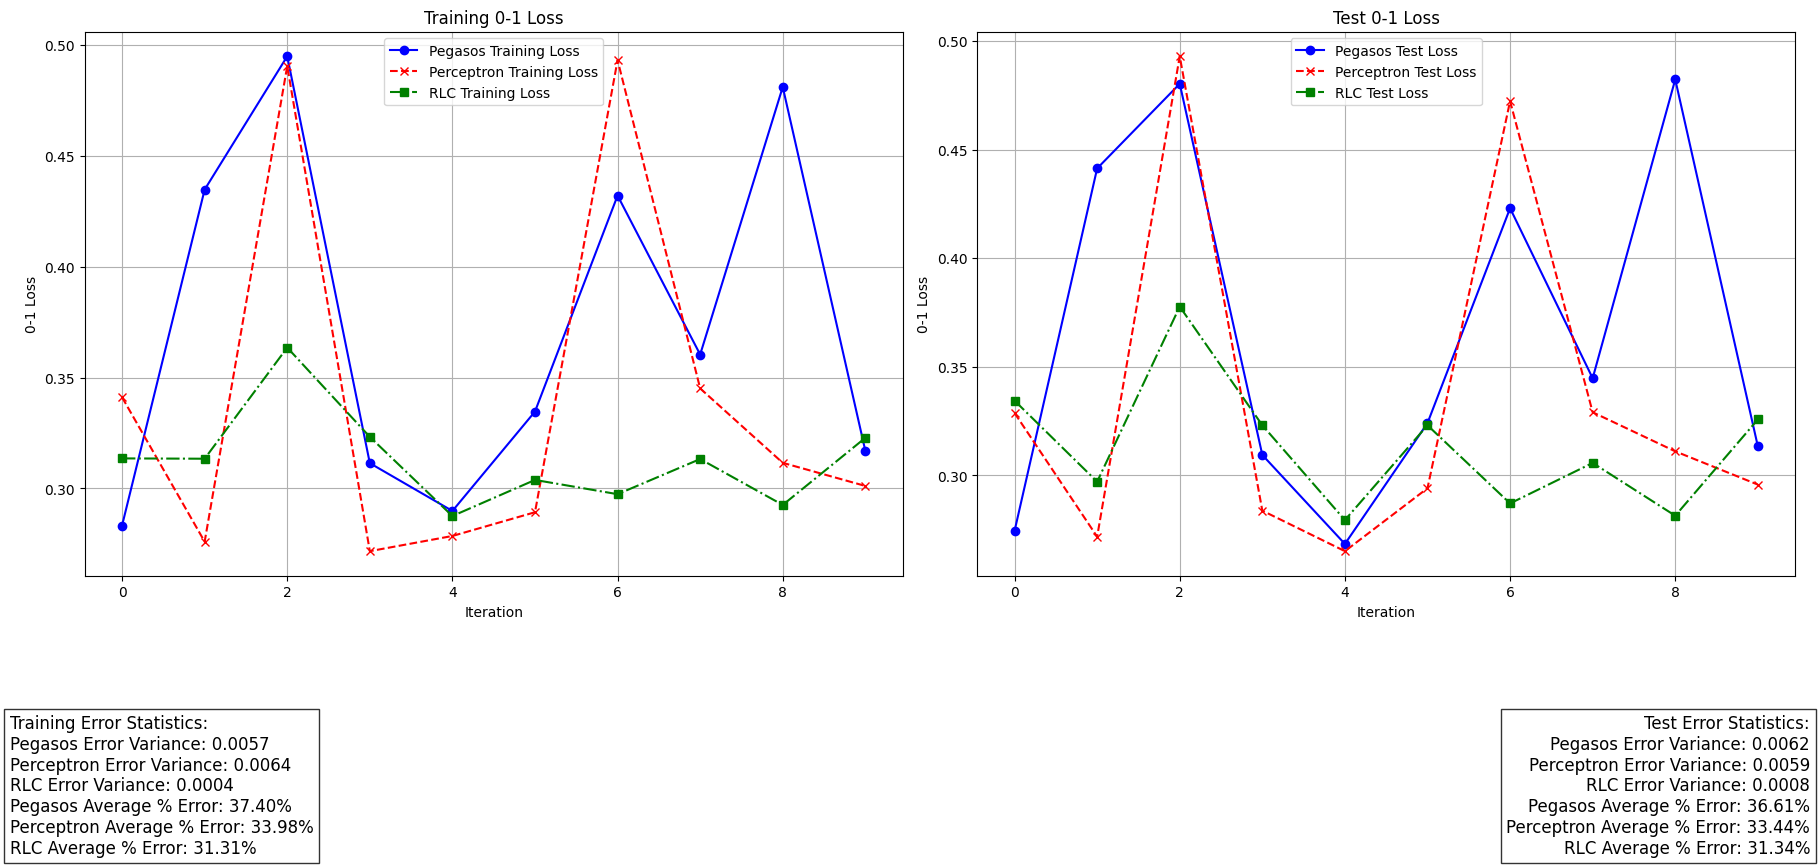

In [10]:
# Calculate variance and average percentage
variance_zol_training_pegasos = np.var(zol_training_pegasos)
average_zol_training_pegasos_percentage = np.mean(zol_training_pegasos) * 100
variance_zol_test_pegasos = np.var(zol_test_pegasos)
average_zol_test_pegasos_percentage = np.mean(zol_test_pegasos) * 100

variance_zol_training_perceptron = np.var(zol_training_perceptron)
average_zol_training_perceptron_percentage = np.mean(zol_training_perceptron) * 100
variance_zol_test_perceptron = np.var(zol_test_perceptron)
average_zol_test_perceptron_percentage = np.mean(zol_test_perceptron) * 100

variance_zol_training_rlc = np.var(zol_training_rlc)
average_zol_training_rlc_percentage = np.mean(zol_training_rlc) * 100
variance_zol_test_rlc = np.var(zol_test_rlc)
average_zol_test_rlc_percentage = np.mean(zol_test_rlc) * 100

# Plotting
plt.figure(figsize=(18, 8))

# Training Loss Graph
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(zol_training_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Training Loss')
plt.plot(zol_training_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Training Loss')
plt.plot(zol_training_rlc, marker='s', linestyle='-.', color='g', label='RLC Training Loss')

plt.title('Training 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()

# Test Loss Graph
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(zol_test_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Test Loss')
plt.plot(zol_test_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Test Loss')
plt.plot(zol_test_rlc, marker='s', linestyle='-.', color='g', label='RLC Test Loss')

plt.title('Test 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()


plt.figtext(0, 0.1, 
            f'Training Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_training_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_training_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_training_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_training_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_training_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_training_rlc_percentage:.2f}%', 
            ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.figtext(1, 0.1, 
            f'Test Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_test_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_test_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_test_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_test_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_test_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_test_rlc_percentage:.2f}%', 
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to provide extra space for annotations
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjusts subplot parameters to fit the text

# Show the plots
plt.show()

### Hypertuning

In [8]:
perceptron_param_grid = {
    'n': [0.01, 0.1],
    'epochs': [100, 500]
}

pegasos_param_grid = {
    'lam': [0.01, 0.1],
    'epochs': [100, 500],
    'batch_size': [100, 500]
}

logistic_param_grid = {
    'lam': [0.01, 0.1],
    'epochs': [100, 500],
    'batch_size': [100, 500]
}

# Split the data
x_train, x_test, y_train, y_test = fun.split_data(data)

# Perform grid search for each model
best_perceptron_params, best_perceptron_loss = fun.grid_search(x_train, y_train, 'perceptron', perceptron_param_grid)
best_pegasos_params, best_pegasos_loss = fun.grid_search(x_train, y_train, 'pegasos', pegasos_param_grid)
best_logistic_params, best_logistic_loss = fun.grid_search(x_train, y_train, 'logistic', logistic_param_grid)

print(f"Best Perceptron Params: {best_perceptron_params} with Loss: {best_perceptron_loss}")
print(f"Best Pegasos Params: {best_pegasos_params} with Loss: {best_pegasos_loss}")
print(f"Best Logistic Params: {best_logistic_params} with Loss: {best_logistic_loss}")

# Train final models with the best hyperparameters and evaluate on the test set
w_perceptron, y_pred_perceptron = fun.perceptron(x_train, y_train, best_perceptron_params['n'], best_perceptron_params['epochs'])
w_pegasos, y_pred_pegasos = fun.pegasos(x_train, y_train, best_pegasos_params['lam'], best_pegasos_params['epochs'], best_pegasos_params['batch_size'])
w_logistic, y_pred_logistic = fun.regularized_logistic(x_train, y_train, best_logistic_params['lam'], best_logistic_params['epochs'], best_logistic_params['batch_size'])

test_loss_perceptron = fun.zero_one_loss(np.sign(np.dot(x_test, w_perceptron)), y_test, len(y_test))
test_loss_pegasos = fun.zero_one_loss(np.sign(np.dot(x_test, w_pegasos)), y_test, len(y_test))
test_loss_logistic = fun.zero_one_loss(np.sign(np.dot(x_test, w_logistic)), y_test, len(y_test))

print(f"Perceptron Test Loss: {test_loss_perceptron}")
print(f"Pegasos Test Loss: {test_loss_pegasos}")
print(f"Logistic Test Loss: {test_loss_logistic}")

Best Perceptron Params: {'n': 0.01, 'epochs': 100} with Loss: 0.27671428571428575
Best Pegasos Params: {'lam': 0.1, 'epochs': 500, 'batch_size': 100} with Loss: 0.3352857142857143
Best Logistic Params: {'lam': 0.1, 'epochs': 500, 'batch_size': 100} with Loss: 0.2957142857142857
Perceptron Test Loss: 0.351
Pegasos Test Loss: 0.3313333333333333
Logistic Test Loss: 0.305
